* This notebook was made to evaluate nowcast-green salinity results.

In [1]:
import datetime
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy.io as sio
%matplotlib inline

In [2]:
import salinity3

In [3]:
paths = {'nowcast': '/results/SalishSea/nowcast/',
          'nowcast-green':'/results/SalishSea/nowcast-green/'}
results_home = [paths['nowcast'],paths['nowcast-green']]

# Daily results

In [4]:
def salinity_plot(saline, run_lower,run_upper):
    lon11, lat11, lon1_2_4, lat1_2_4,\
    value_mean_3rd, value_mean_4rd, \
    value_mean_ave3rd, value_mean_ave4rd,\
    salinity11, salinity1_2_4,date_str = salinity3.salinity_fxn_normwinter(saline, run_date, results_home[0],\
                                                                          run_lower, run_upper)
    
    lon11, lat11, lon1_2_4, lat1_2_4,\
    value_mean_3rd_green, value_mean_4rd_green, \
    value_mean_ave3rdgreen, value_mean_ave4rdgreen,\
    salinity11, salinity1_2_4,date_str = salinity3.salinity_fxn_normwinter(saline, run_date, results_home[1],\
                                                                          run_lower, run_upper)
    
    fig, axs = plt.subplots(1,2,figsize = (15,8))
    axs[0].plot(lon11,value_mean_3rd,'DodgerBlue',linewidth=2, label='nowcast')
    axs[0].plot(lon11,value_mean_3rd_green,'green',linewidth=2, label='nowcast-green')
    axs[0].plot(lon1_2_4,salinity1_2_4,'Indigo',linewidth=2, label='obs')
    
    axs[1].plot(lon11,value_mean_4rd,'DodgerBlue',linewidth=2, label='nowcast')
    axs[1].plot(lon11,value_mean_4rd_green,'green',linewidth=2, label='nowcast-green')
    axs[1].plot(lon1_2_4,salinity1_2_4,'Indigo',linewidth=2, label='obs')
    date_strs = ['lower','upper']
    for ax, strs in zip(axs,date_strs):
        ax.legend(loc = 'best', fontsize = 16)
        ax.set_xlim(-124, -123)
        ax.set_ylim(10, 32)
        ax.set_xlabel('Longitude', fontsize = 16)
        ax.set_ylabel('Practical Salinity', fontsize = 16)
        ax.set_title('comparison in '+str(strs)+' hour'+' on '+date_str, fontsize = 16)
        plt.setp(ax.get_xticklabels(), fontsize=16)
        plt.setp(ax.get_yticklabels(), fontsize=16)
    return fig

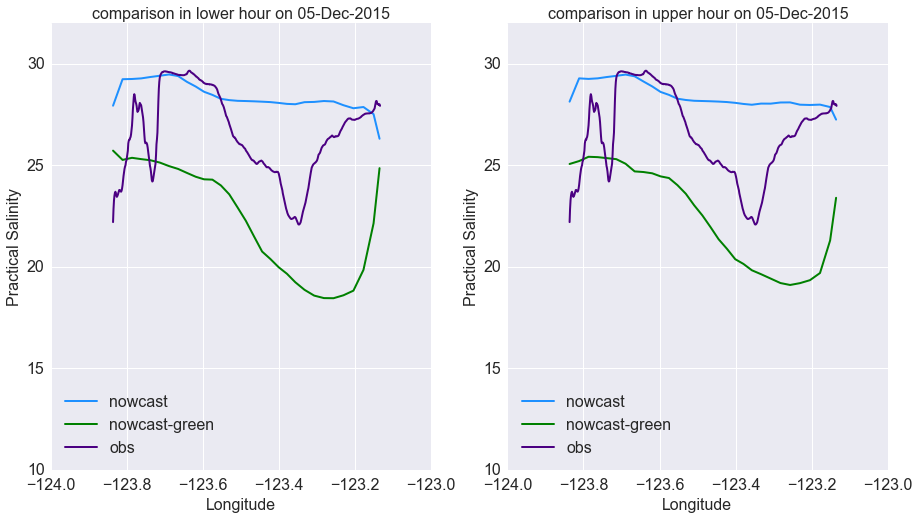

In [5]:
saline = sio.loadmat('/ocean/jieliu/research/meopar/ONC_ferries/TWDP/TWDP_TSG20151204.mat')
run_date = datetime.datetime(2015,12,5)
run_lower = run_date.replace(hour = 2, minute = 0)
run_upper = run_date.replace(hour =4, minute =15)
fig = salinity_plot(saline,run_lower,run_upper)

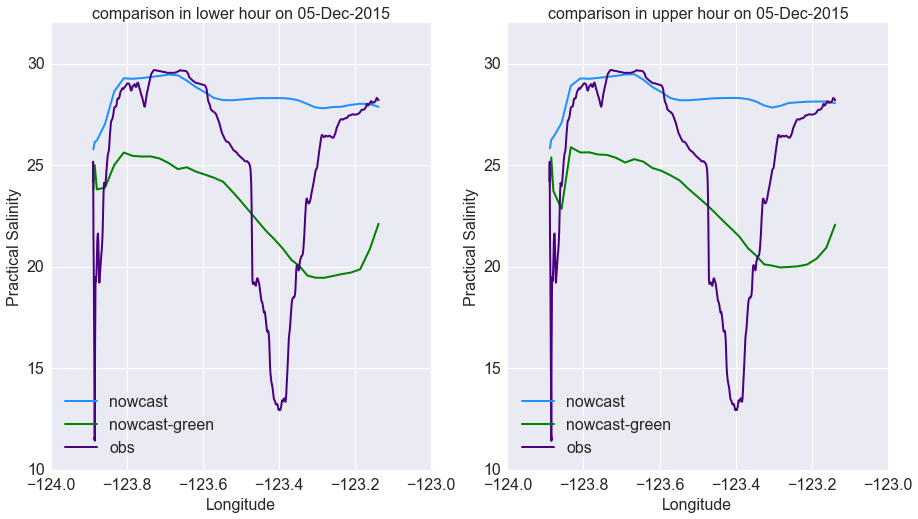

In [6]:
run_lower = run_date.replace(hour = 4, minute = 15)
run_upper = run_date.replace(hour =6, minute =45)
fig = salinity_plot(saline,run_lower,run_upper)

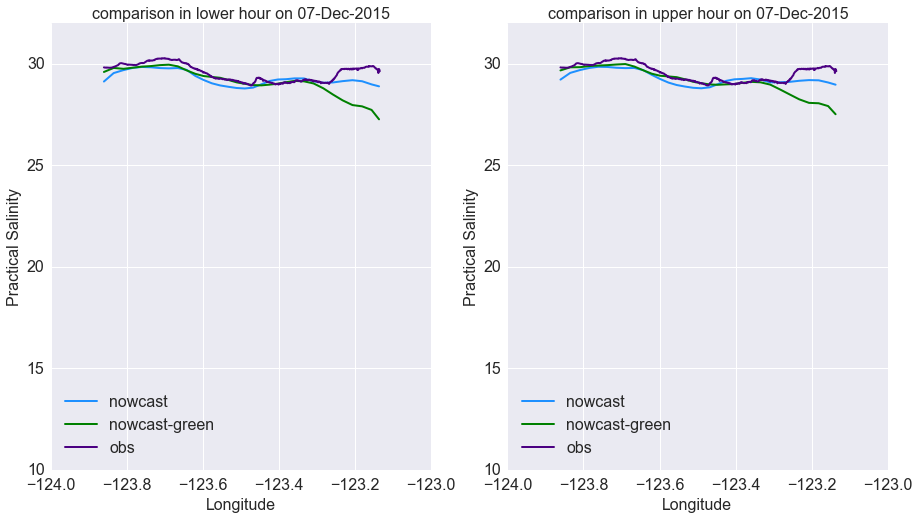

In [7]:
saline = sio.loadmat('/ocean/jieliu/research/meopar/ONC_ferries/TWDP/TWDP_TSG20151206.mat')
run_date = datetime.datetime(2015,12,7)
run_lower = run_date.replace(hour = 2, minute = 0)
run_upper = run_date.replace(hour =4, minute =15)
fig = salinity_plot(saline,run_lower,run_upper)